# Lab : Multiple Variable Linear Regression

In this lab, we'll extend previously developed ML algorithms to support multiple variables (or more precisely, muliple features)

In [1]:
#We'll start with importing useful libraries

import numpy as np
import matplotlib.pyplot as plt
import copy, math
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)

## Notation

Here are the basic terms and their notations we'll be using throughout this course.
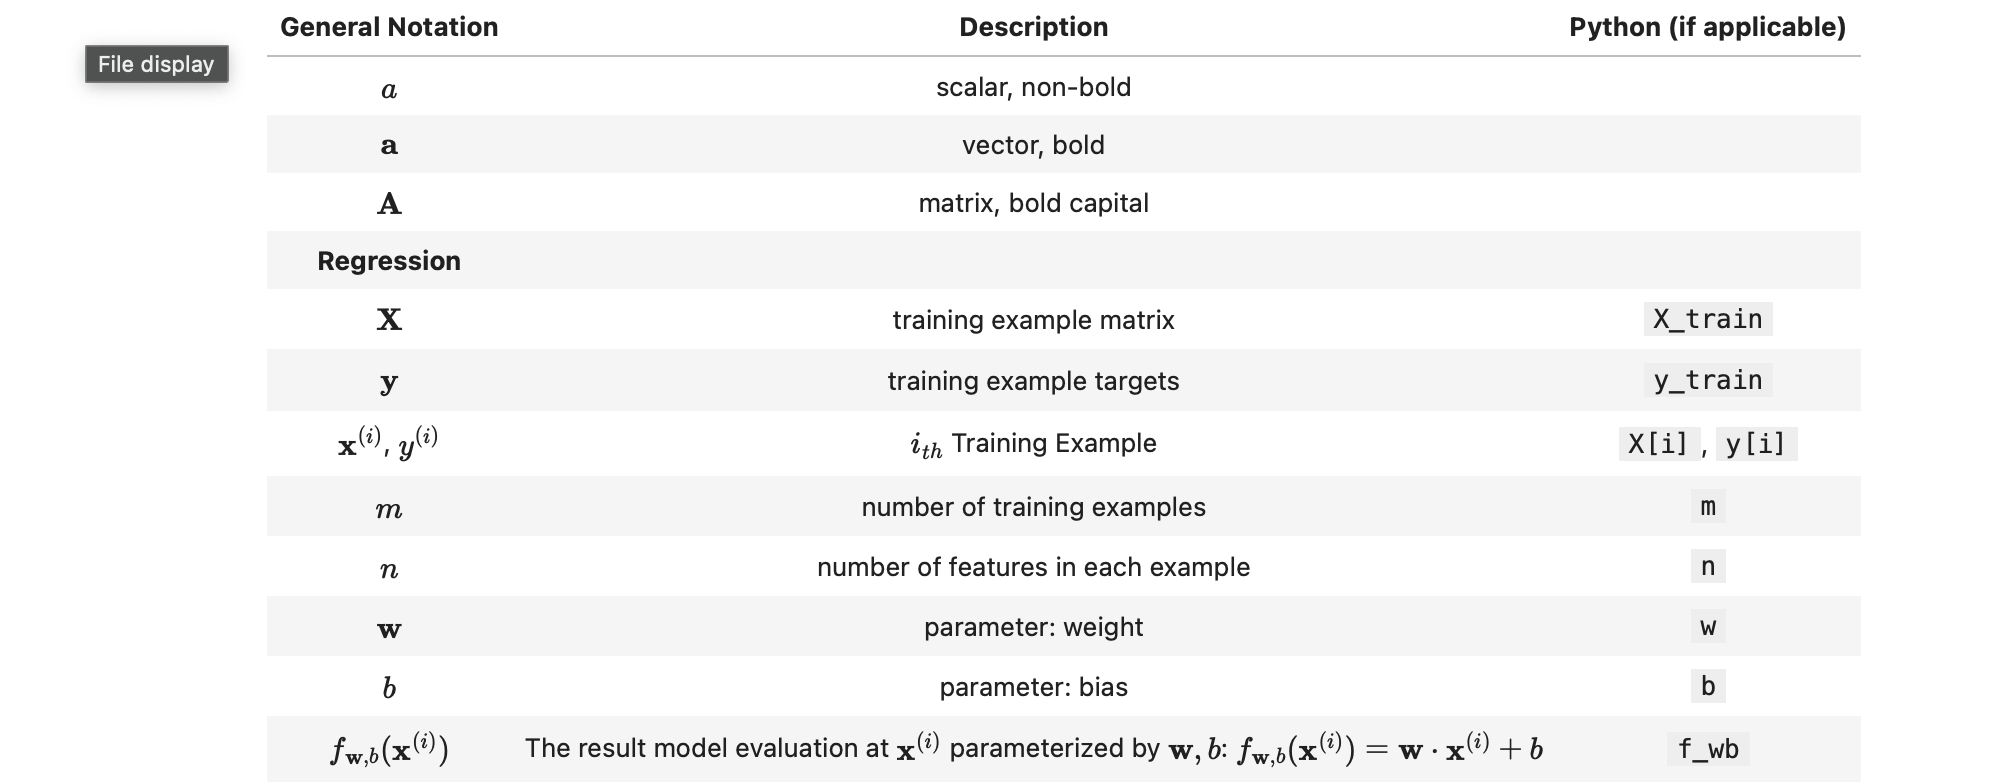

## Problem Statement

Now let's move ahead with the same problem we've done previously, but this time with different dataset and multiple features.
Below is the training data:
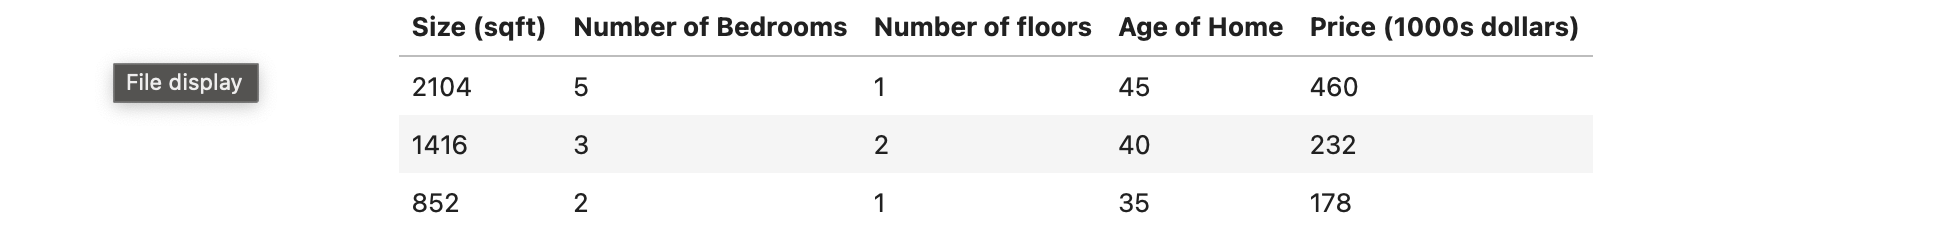

In [2]:
# Turning our example data into code
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40],[852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

## Parameter Vector w and scaler b

In single variable, we've seen that w is used to be a scaler, because we had only one feature, but now in the mutiple variable, param w will be set of scaler to be multiplied with different features, more precisely, it's a vector now.

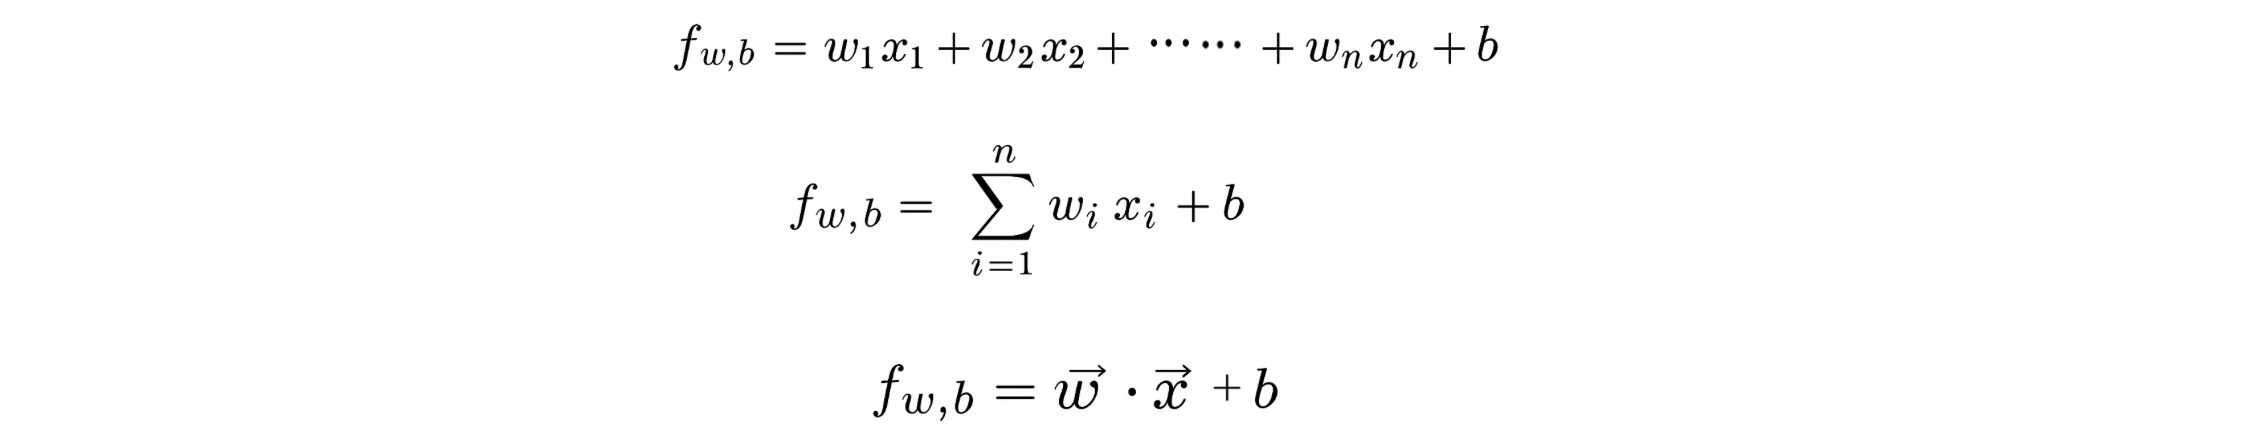
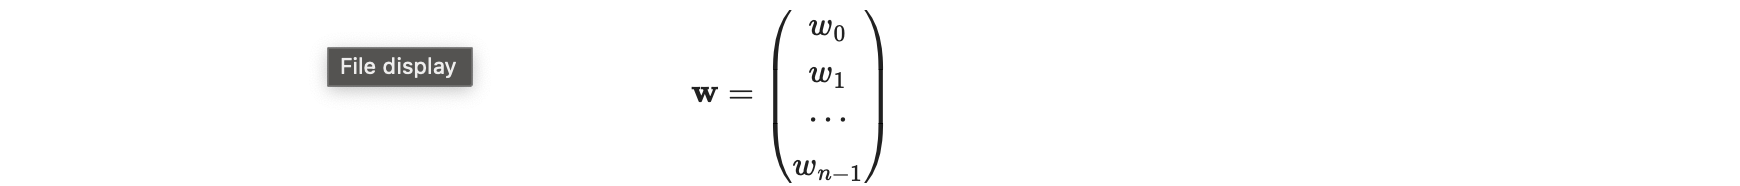

In [3]:
#Initializing vector w and scalar b
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

## Single prediction (element by element/Non-vectorization)

Single prediction element by element. Function to compute the value of `f_wb` for each training example based on prediction of `w` and `b`.

In [4]:
def single_prediction(x, w, b):
    """
    Function to compute value of equation f_wb = w*x + b, where w and x are vectors, using linear regression.
    Param:
      x : Vector x containing the features for a single example
      w : vector w containing the values of w predicted by our model
      b : scalar b, the value predicted by our model

    Return:
      f_wb : value of w*x + b (where w and x are vectors) computed by the function
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = w[i]*x[i]
        p = p + p_i
    p = p + b
    return p

In [5]:
x_vec = X_train[0, :]
print(f"x[0] : {x_vec}")
f_wb = single_prediction(x_vec, w_init, b_init)
print(f"f_wb = {f_wb}")

x[0] : [2104    5    1   45]
f_wb = 459.9999976194083


## Single Prediction (Using vectorization)
Single prediction using vectorization. Function to compute the value of f_wb for each training example based on prediction of `w` and `b`.

In [6]:
def prediction(x, w, b):
    """
    Function to compute value of equation f_wb = w*x + b, where w and x are vectors, using linear regression.
    Param:
      x : Vector x containing the features for a single example
      w : vector w containing the values of w predicted by our model
      b : scalar b, the value predicted by our model

    Return:
      f_wb : value of w*x + b (where w and x are vectors) computed by the function
    """
    p = np.dot(w, x) + b
    return p

In [7]:
x_vec = X_train[0, :]
print(f"x[0] : {x_vec}")
f_wb = single_prediction(x_vec, w_init, b_init)
print(f"f_wb = {f_wb}")

x[0] : [2104    5    1   45]
f_wb = 459.9999976194083


## Cost function (for multiple variables)

Modified version of the cost fucntion we've made earlier for single variable/feature to make it compute cost of multiple variable/features.

In [8]:
def compute_cost(X, y, w, b):
    """
    Param:
      X : Matric X, containing m examples with n features from training data
      y : vector y, containing the target values corresonding to each training data
      w : vector w, containg the model predicted values of w corresponding to each feature
      b : scalar b, containing the model prediction value of b

      Return:
        cost : Cost/Error in the model prediction and target value
    """

    cost = 0.0
    m = X.shape[0]

    for i in range(m):
        f_wb_i = (y[i] - prediction(X[i], w, b))
        cost += f_wb_i**2
    cost = cost / (2*m)
    return cost

In [ ]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

# Gradient Descent with Multiple Variables

Gradient descent for multiple variables: 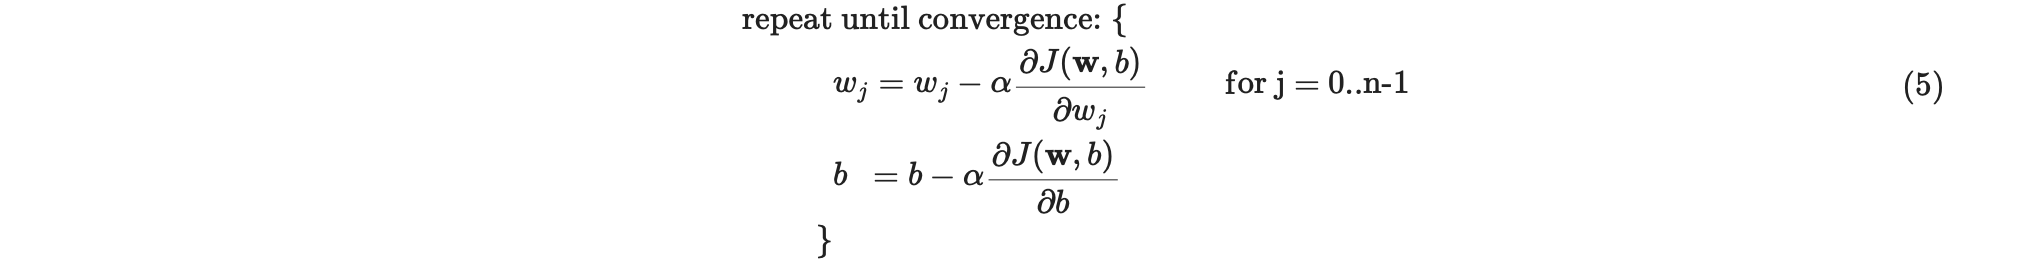
where, n is the number of features, parameters `w` and `b` are updated simultaneously and where 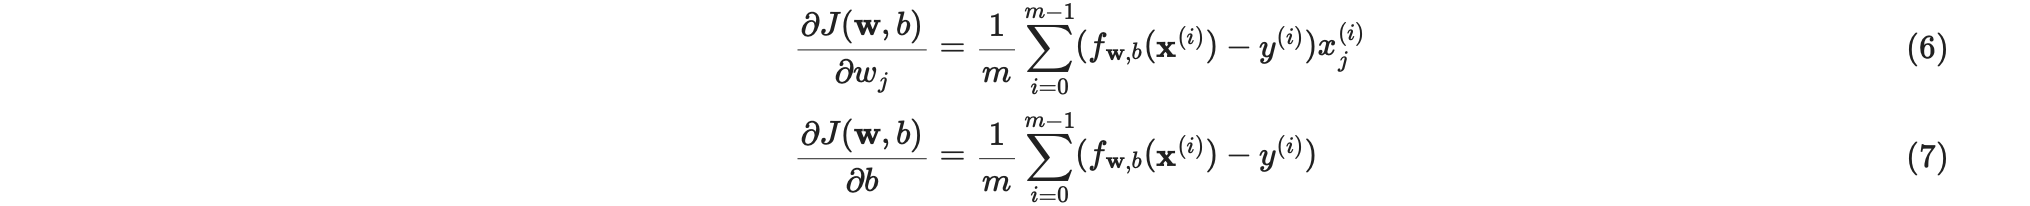
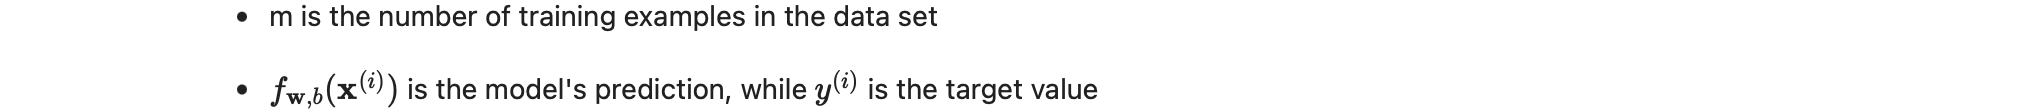

## Compute Gradient with Multiple Variables
As we've already defined the function to compute gradient previously, but it was for single variable. Let's modify it to make it able to compute for gradient for multiple variables.

In [9]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression 
    Param:
      X : Matrix X, containing m examples with n features
      y : vector y, containg target values
      w : vector w, containg model parameters for different features  
      b : scalar b, model parameter
      
    Returns:
      dj_dw : The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b. 
    """

    m,n = X.shape
    dj_dw = np.zeros((n, ))
    dj_db = 0.0

    for i in range(m):
        cost = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):
            dj_dw[j] = dj_dw[j] + cost*X[i, j]
        dj_db = dj_db + cost

    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw, dj_db

In [10]:
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, w_init, b_init)
print(f"Computed dj_dw = {tmp_dj_dw}, Computed dj_db = {tmp_dj_db}")

Computed dj_dw = [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05], Computed dj_db = -1.673925169143331e-06


## Gradient Descent with Multiple Variables

Calculating gradient descent with multiple variables using equation 5.

In [11]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        dj_dw, dj_db = gradient_function(X, y, w, b)

        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        if i<100000:  #This limits the amount of memory used for storing history, which is important for large numbers of iterations.
            J_history.append(cost_function(X, y, w, b))

        #This prints progress every 10% of the total iterations, using formatted strings for readability. The use of `math.ceil` ensures at least one log even for small iteration counts.
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f} ")

    return w, b, J_history

In the next codecell let's see the results of our gradient_descent function

In [12]:
initial_w = np.zeros_like(w_init)
initial_b = 0.0

iterations = 1000
alpha = 5.0e-7

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46 
Iteration  100: Cost   695.99 
Iteration  200: Cost   694.92 
Iteration  300: Cost   693.86 
Iteration  400: Cost   692.81 
Iteration  500: Cost   691.77 
Iteration  600: Cost   690.73 
Iteration  700: Cost   689.71 
Iteration  800: Cost   688.70 
Iteration  900: Cost   687.69 
b,w found by gradient descent: -0.00,[ 0.2   0.   -0.01 -0.07] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


## Plotting Graph
Let's plot graphs for better understanding of how cost is reduced and we get optimal values of w and b using Gradient Descent.

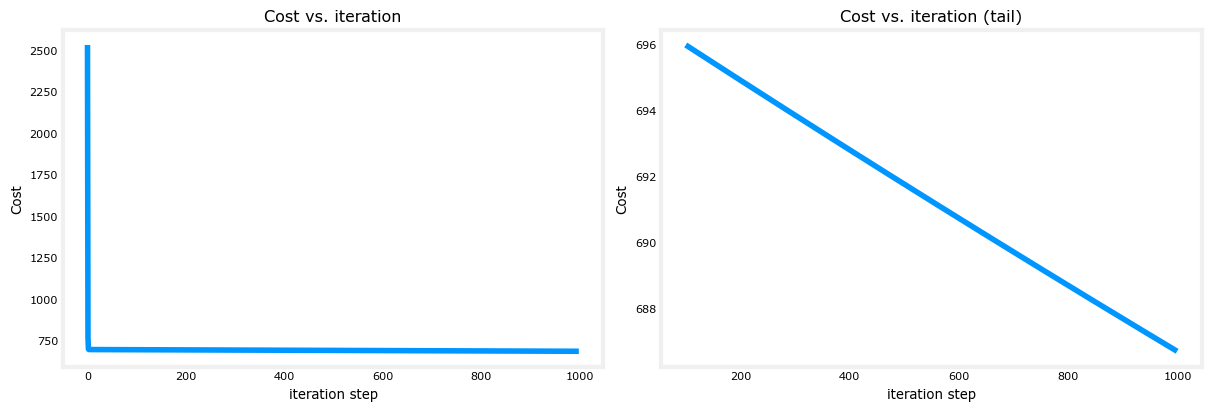

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

## Playing with the model for better results

Now as we have seen our model is working fine but still it's not that accurate, we can further reduce the cost by increasing the number of iterations. let's play with the number of iterations and learning rate to get optimal value and best prediction results.

Iteration    0: Cost  2529.46 
Iteration 50000: Cost   571.36 
Iteration 100000: Cost   563.25 
Iteration 150000: Cost   563.25 
Iteration 200000: Cost   563.25 
Iteration 250000: Cost   563.25 
Iteration 300000: Cost   563.25 
Iteration 350000: Cost   563.25 
Iteration 400000: Cost   563.25 
Iteration 450000: Cost   563.25 
b,w found by gradient descent: 0.02,[ 0.24  1.36 -3.86 -1.44] 
prediction: 440.40, target value: 460
prediction: 276.82, target value: 232
prediction: 151.91, target value: 178


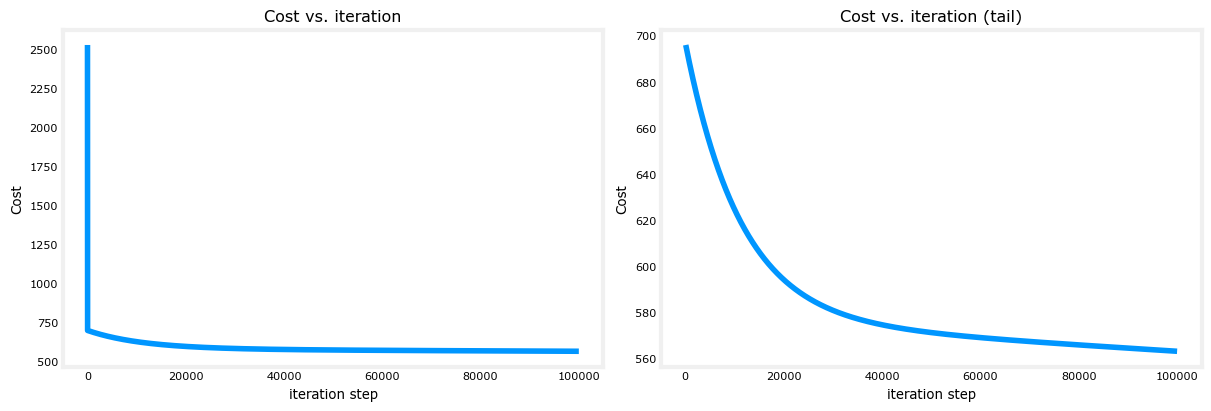

In [15]:
iterations = 500000
alpha = 5.0e-7

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

#Plotting graph for prediction based on above data with higher number of iterations
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

## Results
As you can see the output of the above code cell, we've reduced the cost to it's lowest that is `563.25`, using Gradient Descent. It took some time as the number of iteration were large, but we got lower cost than. Also we can see the graph, it's more steepier than the previous one. Since we got our model predicted values of `w(vector)` and `b`.